# An Investigation of Sorting Algorithms

## Libraries

In [133]:
import numpy as np # For randomly generating numbers
import pandas as pd #For reading csv files, generating dataframes and plots for same
import matplotlib.pyplot as plt
import time

## Introduction

<b>A sorting algorithm arranges a list of items in some predetermined order.</b> 

For this investigation, I'm going to look at ordering discrete numerical elements, in ascending order, for smallest to biggest. Sorting is essentially a permutation of list elements, and does not alter any of the elements in the list. 

Much of early computing advancements focused on finding effective sorting methods. This is because sorting elements allow for a number of tasks to be completed quicker than in a list of unsorted items. It's essential in data analysis, when determining the maximum, minimum, median and inter-quartile range. Also, sorting is often pre-processing step in search algorithms, allowing for more effective identification of specific or duplicate entries.

### Project Intentions 

In the course of this investigation, I will discuss and benchmark the following sorting algorithms:
* Bubble Sort
* Insertion Sort
* Binary Insertion
* Merge Sort
* Bucket Sort

I have chosen these sorting algorithms as they include examples of simple and effective comparison based sorting algorithms, non-comparison based sorting algorithms and hybrid sorting algorithms. My decision to examine Binary Insertion Sort, was in part due to the improved time complexity of this algorithm, when compared to the traditional Insertion Sort. 

I will discuss these types of sorting algorithms with reference to the specific examples I have chosen, and plot their running time against the size of inputs. To more effectively compare these algorithms, I will also run each algorithm ten times for each input, and determine the average running time.

### Terminology

* The **worst - case scenario** refers to an input that will result in the longest possible running time. In the case of sorting algorithms, this will often refer to an input that is in reverse order, or already sorted. 


* With respect to duplicate entries, a **stable sorting algorithm** will preserve the order of duplicate entries while an **unstable sorting algorithm** will not. All of the sorting algorithms I've chosen to investigate are stable sorting algorithms. 


* An **in-place sorting algorithm** uses a fixed additional amount of working space, and is independent of it's input size. Another trait of an in-place algorithm is that the input is overwritten by the output.


### Time Complexity

When benchmarking algorithms, we are often concerned with how long it takes a function to execute. This is a complex question to answer and the answer varies considerabily based on the input size, and the specification of the machine running the program. 

Time Complexity is a way we can measure how the execution time increases as the input sizes increases. It is often estimated by counting the number of operations an algorithm has to perform before terminating, and assumes that the time taken and the number of operations won't differ by more than a constant value. It can be most simplistically described as a function which models the number of operations, given incrementally increasing input sizes. However in most instances, inputs with the same size can result in a different number of operations and have different execution times. As a result we may need to consider the worst case, best case and average case complexities to fully understand the limitations of an algorithm. 

Big O notation is a mathematical notation used to classify algorithms based on their worst case time complexity. 
* $O(n)$ describes an algorithm whose time complexity increases linearly and is proportionate to its input size. While some algorithms achieve $O(n)$ in best case scenarios it is unlikely to be achieved in average or worst cases.
* $O(n^2)$ describes an algorithm whose time complexity is best modelled by a quadratic function. It is common in algorithms featuring nested iterations through a dataset. For example, and $O(n^2)$ algorithm would take approximately 64 steps to order a list of 8 elements. 
*  $O(nlogn)$, where log refers to the binary logarithm, describes a more effective sorting algorithm. This algorithm would take only 24 steps to order a list of 8 elements, as $8(log8) = 24$.

So let's look at some examples of these three types of functions.

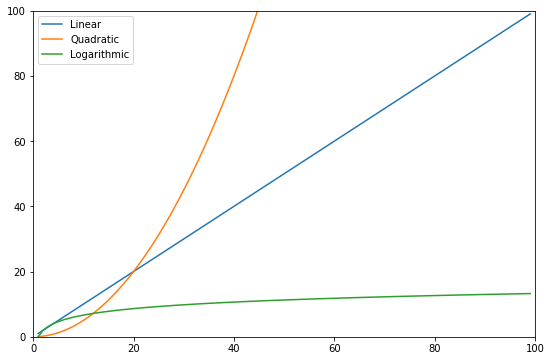

In [134]:
num = range(1, 100, 1)
f = plt.subplots(figsize = (9, 6))
x = [(n) for n in num]
plt.plot(num, x,  label = 'Linear')
y = [(n**2)/20 for n in num]
plt.plot(num, y,  label = 'Quadratic')
z = [(2*(np.log2(n))) for n in num]
plt.plot(num, z,  label = 'Logarithmic')
plt.axis([0, 100, 0, 100])
plt.legend();

## Functions
### Generating Data

In [135]:
#Function used to generate random data
def rand(n):
    array = []
    for i in range(0, n, 1): # for every integer between 1 and n
        gen_rand= np.random.randint(0, 100) # generate a random number
        array.append(gen_rand) # and add it to the array
    return array

In [136]:
#Almost Sorted Data - 100 elements
#Code to create a list of 99 ordered elements, and the 100th element out of order
x = [1, 2, 4, 5, 6, 7, 8, 9]
y = [3]
n = [10, 20, 10, 10, 10, 10, 10, 19]
data = np.concatenate([np.repeat(i, j) for i, j in zip(x, n)])
data = (np.concatenate([data, y])).tolist()


In [137]:
#Almost Sorted Data - 1000 elements
#Code to create a list of 999 ordered elements, and the 1000th element out of order
x = [1, 2, 4, 5, 6, 7, 8, 9]
y = [3]
n = [100, 200, 100, 100, 100, 100, 100, 199]
data2 = np.concatenate([np.repeat(i, j) for i, j in zip(x, n)])
data2 = (np.concatenate([data, y])).tolist()

In [224]:
#Data in reverse order - 1000 elements
x = [9,8,7,6,5,4,3,2]
n = [100, 200, 100, 100, 100, 100, 100, 200]
data3 = np.concatenate([np.repeat(i, j) for i, j in zip(x, n)])
data3 = data3.tolist()

### Benchmarking Functions

In [139]:
#Inputs random array to each function ONLY ONCE
#Returns running time in milliseconds
def compare_all():
    array_1 = []    
    rand_size = [10, 50, 100, 250, 500, 750, 1000, 5000, 7500, 10000]
    functions = [bubbleSort, insertion_sort, bininsertionSort, mergeSort, bucketSort, sorted]
    
    for func in functions: #For every function
        for i in rand_size: #For every input size i
                size = rand(i) #generate a random array of i values
                start = time.time()
                func(size) #pass the array to the function
                end = time.time()
                clock = round(((end - start)*1000), 3) #running time in milliseconds
                array_1.append(clock) #Add running time value to array_1

    df = pd.DataFrame({'Input Size': rand_size, 
                       'BubbleSort': array_1[slice(0, 10, 1)], 
                       'InsertionSort': array_1[slice(10, 20, 1)], 
                       'Binary InsertionSort': array_1[slice(20, 30, 1)], 
                       'MergeSort':array_1[slice(30, 40, 1)], 
                       'BucketSort':array_1[slice(40, 50, 1)], 
                       'Sorted':array_1[slice(50, 60, 1)]})
    
    df.to_csv("data/run_once.csv", index=False)

In [140]:
#Input an array with 100 values
#Returns the mean of every 10 values, as an array
def mean_array(the_array):
    average_time = []
    y1 = np.mean(the_array[slice(0, 10, 1)])
    y2 = np.mean(the_array[slice(10, 20, 1)])
    y3 = np.mean(the_array[slice(20, 30, 1)])
    y4 = np.mean(the_array[slice(30, 40, 1)])
    y5 = np.mean(the_array[slice(40, 50, 1)])
    y6 = np.mean(the_array[slice(50, 60, 1)])
    y7 = np.mean(the_array[slice(60, 70, 1)])
    y8 = np.mean(the_array[slice(70, 80, 1)])
    y9 = np.mean(the_array[slice(80, 90, 1)])
    y10 =np.mean(the_array[slice(90, 100, 1)])
    
    results = [y1, y2, y3, y4, y5, y6, y7, y8, y9, y10]
    return results

In [141]:
#Inputs each random array to each function ten times
#Returns average running time in milliseconds
def bench_ten_runs():
    results=[]
    average_time = []
    final_array= []
    num_runs = 10
    rand_size = [10, 50, 100, 250, 500, 750, 1000, 5000, 7500, 10000]
    functions = [bubbleSort, insertion_sort, bininsertionSort, mergeSort, bucketSort, sorted]
    
  
    for func in functions: #For each function
        for i in rand_size: #input a value
            size = rand(i) 
            for r in range(num_runs):#ten times
                start = time.time()
                func(size) 
                end = time.time()
                clock = (end - start)*1000
                results.append(clock)  # Add time elapsed to array results
        average_time = mean_array(results) # Find average time, for each i in rand_size
        average_time = np.round(average_time, 3) # Round result to 3 dps
        final_array.append(average_time) # Append to final_array
        average_time = [] #set both average_time
        results=[]  #and results to [], before passing through the next function
        
    df4 = pd.DataFrame({'Input Size': rand_size, 'BubbleSort': final_array[0], 
                       'InsertionSort': final_array[1], 'Binary InsertionSort': final_array[2], 
                             'MergeSort':final_array[3], 'BucketSort':final_array[4], 'Sorted':final_array[5]})
    
    df4.to_csv("data/avg_ten_runs.csv", index=False)

## Discussion of Sorting Algorithms

### Bubble Sort

Bubble Sort is a simple comparison based sorting algorithm. It compares every number to it's adjacent number(s), and returns the larger number of the two, in the position with the larger index. It continues this process multiple times, looping through the array, until the set is fully sorted. 

Let's look at an example.

<img src="https://www.w3resource.com/w3r_images/bubble-short.png" style="width: 600px;" />

In the example above, it could be argued that the list of five numbers is already partially sorted before we run the algorithm. The largest value 8 has the largest index. In the first pass, my algorithm compares four pairs of numbers, or $(n-1)$ values, swapping where necessary. As a result, the second largest number ends up in the second last position. 

One value has now been sorted to the correct position. In the next pass, my algorithm will compare $(n-2)$ values, swapping where necessary. In this example, it takes 3 passes to sort the input. However in the worse case scenario, if the largest value was at index 0, it would take $(n)$ passes. 

So in the worst case scenario, my algorithm would compare $(n-1)$ pairs of numbers, $(n)$ times. The algorithm would also perform a number of swaps, but this would be approximated by a linear term. Big O Notation is concerned only with the highest degree of the polynomial that models runtime. The highest degree of the polynomial will determine the rate of growth of the function, as the input size n gets very large. I can disregard the term approximating the number of swaps, as I can already see that my polynomial is of degree 2.

In Bubble Sort, the number of operations the algorithm performs can be approximated by $(n)(n-1)$, giving us a $O(n^2)$ time complexity. I expect that in small sets BubbleSort will work very well, but with larger input sizes it will take considerably longer to run. BubbleSort is alo more effective at sorting lists that are almost sorted. It can be modified to stop early if it finds that the list has become sorted, and in that case it could have a running time of $O(n)$. However that is the best case scenario, where the input is almost sorted list. 

In [142]:
def bubbleSort(alist):
    for passnum in range(len(alist)-1,0,-1): 
        for i in range(passnum): #Goes through a list from last value to first
            if alist[i]>alist[i+1]: # Compares every value to value on its left
                temp = alist[i]  
                alist[i] = alist[i+1] 
                alist[i+1] = temp #Swaps two values, if needed, so the larger value has the larger index                
# Reference: interactivepython.org/runestone/static/pythonds/SortSearch/TheBubbleSort.html, accessed 13th April 2019.

Bubble sort is a stable sort with a space complexity of $O(1)$, because only a single additional memory space is required i.e. for temp variable. 

Let's input a small list of random integers and see how bubbleSort behaves.

In [143]:
mylist = rand(10)
mylist

[47, 83, 43, 74, 40, 47, 70, 63, 62, 84]

In [144]:
bubbleSort(mylist)

In [145]:
mylist

[40, 43, 47, 47, 62, 63, 70, 74, 83, 84]

When we pass a random list of 10 numbers to bubbleSort, the function doesn't return a sorted list, because I haven't specified that it should. Instead I can call the input mylist, after running bubbleSort, and the sorted list will be returned. In this way, bubbleSort overwrites the original input with the sorted list. It is an in-place sorting algorithm. 

Now that we've determined the function is working let's look at how it performs with almost fully sorted lists. First I will compare BubbleSort's performance on lists with 100 elements. The first list contains random elements and is unsorted, while the second list has only one element out of order

In [146]:
start =time.time()
bubbleSort(rand(100)) #100 random variables
end = time.time()
np.round((end - start)* 1000, 3)

3.0

In [147]:
start =time.time()
bubbleSort(data) #A list of 100 values almost fully sorted
end = time.time()
np.round((end - start)* 1000, 3)

1.0

It looks like BubbleSort is more efficient with almost fully sorted lists. Let's see if that's still the case when we have 1000 elements. Again the first input is random, the second has only one element out of order, and my third input is in reverse order.

In [148]:
start =time.time()
bubbleSort(rand(1000)) #1000 random variables
end = time.time()
np.round((end - start)* 1000, 3)

191.043

In [149]:
start =time.time()
bubbleSort(data2) #A list of 1000 values almost fully sorted
end = time.time()
np.round((end - start)* 1000, 3)

0.999

In [150]:
start =time.time()
bubbleSort(data3) #A list of 1000 values in reverse order
end = time.time()
np.round((end - start)* 1000, 3)

430.103

### Insertion Sort vs. Binary Insertion Sort

Insertion Sort takes an unsorted list and compares every element to every element preceding it. It swaps as necessary and 

In my example below, the first comparison occurs when I compare the second element, 7, with the first element 9. 7 is less than 9, so we swap them. Then we are comparing the element at index 3 to all the preceeding elements. 6 is less than both 9 and 7 so it is moved to index 1. 

<img src="https://cdncontribute.geeksforgeeks.org/wp-content/uploads/insertion_sort-recursion.png" style="width: 300px;" />

In this way, Insertion Sort maintains a sorted list to the left of the element it's currently comparing, and an unsorted list to the right. In the worse case, if an input was in reverse order, it would have to compare each element with every preceding number in the sorted list. 

My example above, is not the worst case. There are some instances where the algorithm terminates early, finding the correct index for a number without having to check every single element of it's already sorted list. 

This sorting algorithm makes $(1 + 2 + 3 + 4 + 5 + 6 + ... + n-1)$ comparisons, and in the worst case, it will also complete $(n-1)$ swaps. This implies that the function will have $O(n^2)$ time complexity, similar to BubbleSort. This is also implied by the structure of the algorithm, which contains two nested loops below. 

In [151]:
def insertion_sort(alist):
    for index in range(1,len(alist)): #for every element in alist
        currentvalue = alist[index] 
        position = index 

        while position>0 and alist[position-1]>currentvalue: #Until we reach the first value, if the preceding value is bigger 
            alist[position]=alist[position-1] 
            position = position-1 

            alist[position]=currentvalue #then swap the values and their indexes


In [152]:
mylist = rand(10)
mylist

[30, 34, 59, 66, 57, 14, 29, 70, 60, 59]

In [153]:
insertion_sort(mylist)
mylist

[14, 29, 30, 34, 57, 59, 59, 60, 66, 70]

Like BubbleSort, Insertion Sort is an inplace sorting algorithm, overwiting the original input with the sorted array. It also appears to work best on data that is close to been sorted. 

In [154]:
start =time.time()
insertion_sort(rand(100)) #100 random variables
end = time.time()
np.round((end - start)* 1000, 3)

1.999

In [155]:
start =time.time()
insertion_sort(data) #100 almost sorted
end = time.time()
np.round((end - start)* 1000, 3)

0.0

I will again input three different lists to InsertionSort and look at the time taken to sort them. The first input will be a set of 1000 randonly generated elements, and the second will be a list of 1000 elements with only one out of order. The third input will be a list of 1000 elements in reverse order, which I expect to be close to the worst case time complexity for Insertion Sort.

In [156]:
start =time.time()
insertion_sort(rand(1000)) #1000 random variables
end = time.time()
np.round((end - start)* 1000, 3)

100.022

In [157]:
start =time.time()
insertion_sort(data2) #1000 almost sorted
end = time.time()
np.round((end - start)* 1000, 3)

0.0

In [158]:
start =time.time()
insertion_sort(data3) #1000 in reverse order
end = time.time()
np.round((end - start)* 1000, 3)

1.0

As expected, Insertion Sort performs best on almost fully sorted lists, and is as inefficient as BubbleSort in other cases. It iterates through the set linearly comparing each value to other values in the set, and this appraoach while it's easy to understand is labor intensive.. 

A variation of insertion sort is Binary Insertion Sort. This combines the insertion sort process with a binary search algorithm, and results in fewer comparisons having to be made. Binary Search acts upon already sorted sets. As a result, it is uniquely suited to the Insertion Sort process, where the elements to the left of the item been sorted, are already sorted in order from smallest to biggest. 

In this way, the binary search algorithm can find the correct positon for a new element, without comparing it to all previous elements. Even without calculating the Big O Notation, I believe that this should be a more efficient sorting method. 



Binary insetion sort with duplicate elements - can be sorted to left or right of the duplicate. 

stable, in place and works well on small sets and on sets that are almost fully sorted 

very inefficient for large random sets 

iterative

In normal insertion sort, it takes O(n) comparisons(at nth iteration) in worst case. We can reduce it to O(log n) by using binary search.



In [159]:
#Takes a new item, and return the appropriate index for item in sorted array

def binary_search(the_array, item, start, end): #Input is a sorted array, item to be place in array, start and end
    
    if start == end: # if there's only one item in the sorted array
        if the_array[start] > item: # and start item is bigger than the new item
            return start #return start (so the smaller number has index 0)
        else:
            return start + 1 #otherwise return start+1 (so the bigger number has index 1)
        
    if start > end: #at the last element of the array
        return start #return the index of the last element

    mid = round((start + end)/ 2) #Returns the mean of the range of indices 
    
    # determine which side to search
    if the_array[mid] < item: # if new item is less than the middle value
        return binary_search(the_array, item, mid + 1, end) # search array of indices above mid

    elif the_array[mid] > item:
        return binary_search(the_array, item, start, mid - 1) # search array of indices below mid

    else:
        return mid # Otherwise mid = item, so return mid

In [160]:
def bininsertionSort(the_array):
        
    l = len(the_array) #set l to the number of values in array
    for index in range(1, l): #for every index
        value = the_array[index] #value is equal to element in that position
        pos = binary_search(the_array, value, 0, index - 1) #perform binary search to find the appropriate index for value
        the_array = the_array[:pos] + [value] + the_array[pos:index] + the_array[index+1:]
        
    return the_array

#Reference:http://interactivepython.org/courselib/static/pythonds/SortSearch/TheInsertionSort.html, accessed 13th April 2019.
#Reference:http://skerritt.tech/blog/timsort/, accessed 13th April 2019.

In [161]:
mylist = rand(10)
mylist

[55, 19, 31, 7, 54, 88, 57, 34, 67, 97]

In [162]:
bininsertionSort(mylist)

[7, 19, 31, 34, 54, 55, 57, 67, 88, 97]

Not an inplace sorting algorithm

In [163]:
mylist

[55, 19, 31, 7, 54, 88, 57, 34, 67, 97]

In [164]:
start =time.time()
bininsertionSort(rand(100)) #100
end = time.time()
np.round((end - start)* 1000, 3)

1.997

In [165]:
start =time.time()
bininsertionSort(data) #100
end = time.time()
np.round((end - start)* 1000, 3)

1.999

In [166]:
start =time.time()
bininsertionSort(rand(1000)) #100
end = time.time()
np.round((end - start)* 1000, 3)

28.003

In [167]:
start =time.time()
bininsertionSort(data2) #100
end = time.time()
np.round((end - start)* 1000, 3)

1.004

In [225]:
start =time.time()
bininsertionSort(data3) #100
end = time.time()
np.round((end - start)* 1000, 3)

29.003

I have returned the sorted list from the function in order to check the algorithm runs correctly, but this also highlights another difference between these two algorithms. Unlike Insertion Sort, Binary Insertion Sort is not an inplace sorting algorithm. When I call the input mylist again, the unsorted input is returned. 

### Merge Sort

Merge Sort is known as a divide and conquer algorithm. 

<img src="https://www.w3schools.in/wp-content/uploads/2016/09/Merge-Sort-Technique-1.png" style="width: 400px;" />

Merge Sort involves splitting an input into smaller subsets, and ordering those small lists before merging. In fact, merge sort 
keeps splitting the subsets until we have n lists of size 1. The algorithm then merges the lists to form n/2 lists of size 2 or 3. It does this by comparing the elements at index 0 in both sets, and the smaller of the two will have index 0, in the merged list. 

On it's next merge, the algorithm is working with larger lists but it begins by comparing the elements at index 0. Again the smallest item from both lists will be in the first position. The algorithm then compares the index 0 element that remains, to the value at index 1 in the other set. The smaller of the two is again added to the merged list. The algorithm now compares the item with the smalles index in one set, to the item with the smallest index in the other set, again adding the smaller of the two to the merged set. 

The algorithm continues to


Mergesort's time complextity is equal to $n(logn)$, making it the most efficient sorting algorithm we've encountered so far. Given an input with size 8, mergesort would split the list into two lists of size 4. Then 4 lists of size 2 and finally 8 lists of size 1. 
Given f(n), a function for execution time based on input size, $f(n) = 8(n /8)$ 

Mergesort is a recursive algorithm, that calls MergeSort within itself, as you can see in the code example below. 

In [169]:
def mergeSort(alist):

    if len(alist)>1: #If there's more than one element
        mid = len(alist)//2 #get the middle index
        lefthalf = alist[:mid] #lower subarray is below mid
        righthalf = alist[mid:] #upper subarray is above mid

        mergeSort(lefthalf) 
        mergeSort(righthalf) #Pass both subarrays back into merge sort

        i=0
        j=0
        k=0
        while i < len(lefthalf) and j < len(righthalf): #until we've reached the end of ONE subarray
            if lefthalf[i] < righthalf[j]: #if the ith number on left is less than the ith number on right
                alist[k]=lefthalf[i] #the kth element of alist is the ith value in the lefthalf
                i=i+1 #Next we'll compare the (i+1)th value on the left, to the ith value on the right 
            else:
                alist[k]=righthalf[j] #otherwise the kth element of alist is the ith value in the righthalf
                j=j+1#Next we'll compare the (i+1)th value on the right, to the ith value on the left 
            k=k+1 # +1 to k, as we're going to be looking at the next element next

        while i < len(lefthalf): #if there's still one number in the lefthalf
            alist[k]=lefthalf[i] #add it to alist
            i=i+1
            k=k+1

        while j < len(righthalf): #if there's still one number in the righthalf 
            alist[k]=righthalf[j] #add it to alist
            j=j+1
            k=k+1
        
            
#Reference: http://interactivepython.org/courselib/static/pythonds/SortSearch/TheMergeSort.html, accessed 13th April 2019.

In [170]:
mylist = rand(10)
mylist

[64, 39, 28, 63, 69, 36, 29, 16, 69, 9]

In [171]:
mergeSort(mylist)

In [172]:
mylist

[9, 16, 28, 29, 36, 39, 63, 64, 69, 69]

Merge Sort is an inplace sorting algorithm like Bubble Sort and Insertion Sort.  

In [173]:
start =time.time()
mergeSort(rand(100)) #100 random variables
end = time.time()
np.round((end - start)* 1000, 3)

1.003

In [174]:
start =time.time()
mergeSort(data) #100 random variables
end = time.time()
np.round((end - start)* 1000, 3)

0.0

When I pass two lists of size 100 to mergeSort, where one is random and the second has only one element out of order, there is no evidence that mergeSort is more efficient on almost sorted lists. 

Let's try the same with lists of size 1000. Again the first input is random, the second input has one element out of order and the third is in reverse order.

In [175]:
start =time.time()
mergeSort(rand(1000)) #10,000 random variables
end = time.time()
np.round((end - start)* 1000, 3)

10.0

In [176]:
start =time.time()
mergeSort(data2) #1000 almost sorted
end = time.time()
np.round((end - start)* 1000, 3)

1.001

In [177]:
start =time.time()
mergeSort(data3) #1000 reverse order
end = time.time()
np.round((end - start)* 1000, 3)

10.998

### Bucket Sort

Bucket sort is a divide and conquer sorting algorithm. It divides a list into a number of buckets. Each bucket is sorted individually. This can be done by applying a different sorting algorithm, or by recursively applying the bucket sorting algorithm.

Given a list of numbers, $29$, $25$, $3$, $49$, $9$, $37$, $21$, $43$

<img src = "https://upload.wikimedia.org/wikipedia/commons/e/e3/Bucket_sort_2.svg" style="width: 400px;" />

Bucket sort is a stable sort which works by distributing the elements of an array into a series of buckets. Each bucket is then sorted individually, wither using a different sorting algorithm or by recursively applying the Buketsort algorithm. 

Time coplexity is n^2 in the worst case, and n+k in the besta and average, where k is the number of buckets. 
Worst case space complexity is O(nk)

buckets sorts performance degrades with clustering if many values occur close tgether they wil fall in to a single buckets and be sorted slowly

**WIKI says**



A bucket sort works best when the elements of the data set are evenly distributed across all buckets.

In [178]:
def bucketSort(alist):
    largest = max(alist) #Set max
    length = len(alist) #Set input size = length
    size = largest/length #Divide max by len to get range of buckets
 
    buckets = [[] for _ in range(length)]
    for i in range(length):
        j = int(alist[i]/size)
        if j != length:
            buckets[j].append(alist[i])
        else:
            buckets[length - 1].append(alist[i])
 
    for i in range(length):
        insertion_sort(buckets[i]) # apply insertion sort
 
    result = []
    for i in range(length):
        result = result + buckets[i]
    
    return result

#Reference: https://www.sanfoundry.com/python-program-implement-bucket-sort/, accessed 13th April 2019.

In [179]:
mylist = rand(10)
mylist

[63, 59, 96, 3, 81, 66, 71, 45, 5, 42]

In [180]:
bucketSort(mylist)

[3, 5, 42, 45, 59, 63, 66, 71, 81, 96]

In [181]:
mylist

[63, 59, 96, 3, 81, 66, 71, 45, 5, 42]

Note that I returned the sorted array from my function as Bucket Sort is not an in-place sorting algorithm

In [183]:
start =time.time()
bucketSort(rand(100))
end = time.time()
np.round((end - start)* 1000, 3)

0.998

In [184]:
start =time.time()
bucketSort(data)
end = time.time()
np.round((end - start)* 1000, 3)

0.0

In [185]:
start =time.time()
bucketSort(rand(1000)) #10 random variables
end = time.time()
np.round((end - start)* 1000, 3)

12.003

In [186]:
start =time.time()
bucketSort(data2) #10 random variables
end = time.time()
np.round((end - start)* 1000, 3)

0.0

In [187]:
start =time.time()
bucketSort(data3) #10 random variables
end = time.time()
np.round((end - start)* 1000, 3)

12.003

## Comparing Sorting Algorithms 

For the purposes of benchmarking my sorting algorithms, I will pass ten sets of randomly generated data to each once. I will be comparing BubbleSort, InsertionSort, Binary InsertionSort, MergeSort and BucketSort. 

In [220]:
compare_all() #Run function and create csv file with results

In [221]:
df = pd.read_csv('data/run_once.csv')
df

,Input Size,BubbleSort,InsertionSort,Binary InsertionSort,MergeSort,BucketSort,Sorted
0,10,0.000,0.000,0.000,0.000,0.000,0.000
1,50,1.000,0.000,1.002,1.002,0.000,0.000
2,100,1.999,1.000,0.999,0.998,1.000,0.000
3,250,12.000,6.001,4.004,2.000,0.000,0.000
4,500,62.021,26.006,29.007,4.001,2.002,0.000
5,750,155.037,62.015,19.006,7.003,4.001,0.000
6,1000,343.086,113.028,29.006,7.999,4.001,0.000
7,5000,5592.408,3748.941,427.108,45.011,72.018,2.001
8,7500,12198.073,7543.899,870.219,74.019,154.040,2.000
9,10000,21239.347,13627.428,1531.384,105.027,265.067,4.000


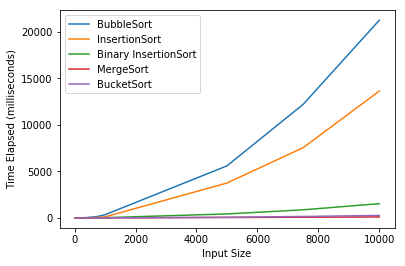

In [222]:
ax = df.plot(x='Input Size', y=['BubbleSort', 'InsertionSort', 'Binary InsertionSort', 'MergeSort', 'BucketSort'])
ax.set_ylabel("Time Elapsed (milliseconds)");

As expected BubbleSort and Insertion Sort, seem to most closely resemble quadratic functions. I am surprised that Insertion Sort is only marginally more efficient than BubbleSort.

Binary Insertion Sort, performed marginally better than both of these algorithms. While MergeSort performed as expected, I was suprised BucketSort didn't more closely resemble a quadratic. 

Let's look at just the three best performing algorithms.

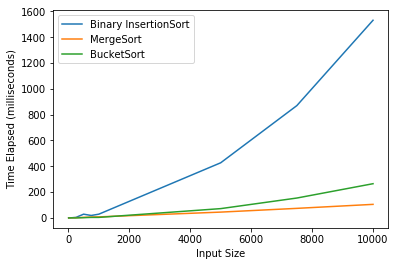

In [223]:
ax = df.plot(x='Input Size', y=['Binary InsertionSort', 'MergeSort', 'BucketSort'])
ax.set_ylabel("Time Elapsed (milliseconds)");

In this plot, it is clearer that Binary Insertion Sort, while more effective than Bubble Sort and Insertion Sort, could still model a quadratic function. Merge Sort which I expected to have logarithmic complexity performed as expected. However Bucket Sort doesn't appear quadratic. 

If I plot MergeSort, and compare it to the Python in-built sorting agorithm Sorted, I find that my best implementation of a sorting algorithm takes much more time than the inbuilt sorting algorithm.

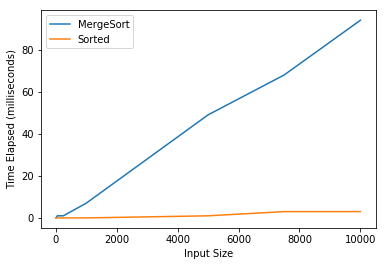

In [211]:
ax = df.plot(x='Input Size', y=['MergeSort','Sorted'])
ax.set_ylabel("Time Elapsed (milliseconds)");

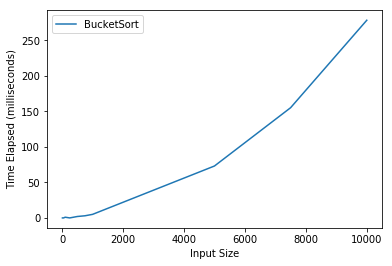

In [212]:
ax = df.plot(x='Input Size', y=['BucketSort'])
ax.set_ylabel("Time Elapsed (milliseconds)");

Bucket Sort may not model a quadratic function in this instance, but this result is based on only one run. By looking at how Bucket Sort performs over ten runs and getting the average execution time per run, I should get a better estimation of this algorithms performance. 

From this plot, it looks like Bucket Sort is almost as efficient as MergeSort when the input size is around 7500. No other algorithm shows a dip at this input size, and it is probably not significant. 

## Benchmarking Sorting Algorithms

For the purposes of benchmarking my sorting algorithms, I will pass ten sets of randomly generated data to each function ten times. I will be use the same six algorithms from the previous comparison: BubbleSort, InsertionSort, Binary InsertionSort, MergeSort, BucketSort and Python's in-built Sorted function. 

In [194]:
bench_ten_runs() #Run function and create csv file with results

In [195]:
df2 = pd.read_csv('data/avg_ten_runs.csv')
df2

,Input Size,BubbleSort,InsertionSort,Binary InsertionSort,MergeSort,BucketSort,Sorted
0,10,0.000,0.000,0.000,0.100,0.100,0.000
1,50,0.400,0.100,0.400,0.200,0.100,0.000
2,100,1.100,0.100,0.900,0.700,0.200,0.000
3,250,6.001,0.700,3.701,2.000,0.700,0.100
4,500,24.306,2.601,10.102,6.002,1.901,0.100
5,750,54.513,6.302,16.404,10.003,3.501,0.200
6,1000,99.625,12.203,49.612,6.801,6.102,0.200
7,5000,2693.277,308.678,423.006,43.511,138.235,1.600
8,7500,6434.418,694.975,921.432,76.619,196.550,2.501
9,10000,11271.537,1214.106,1832.261,97.724,289.372,3.501


In [196]:
desc = (df2.describe()).transpose()
desc.iloc[1:]

,count,mean,std,min,25%,50%,75%,max
BubbleSort,10.0,2058.5177,3849.121056,0.0,2.32525,39.4095,2044.86400,11271.537
InsertionSort,10.0,223.9765,415.112691,0.0,0.25000,4.4515,234.55925,1214.106
Binary InsertionSort,10.0,325.7818,607.971191,0.0,1.60025,13.2530,329.65750,1832.261
MergeSort,10.0,24.3660,35.844597,0.1,1.02500,6.4015,35.13400,97.724
BucketSort,10.0,63.6761,105.926689,0.1,0.32500,2.7010,105.20175,289.372
Sorted,10.0,0.8202,1.266874,0.0,0.02500,0.1500,1.25000,3.501


From the summary statistics, it's easier to verify which algorithms perform best on different types of data. 

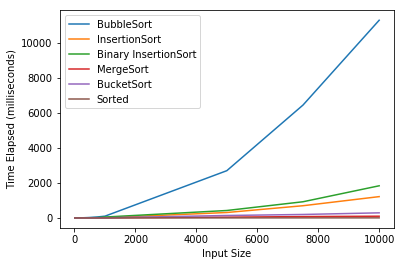

In [197]:
ax = df2.plot(x='Input Size', y=['BubbleSort', 'InsertionSort', 'Binary InsertionSort', 'MergeSort', 'BucketSort', 'Sorted'])
ax.set_ylabel("Time Elapsed (milliseconds)");

From this plot, it is obvious that BubbleSort is the least efficient sorting algorithm.

Removing BubbleSort, I can get a better look at my other sorting algorithms.

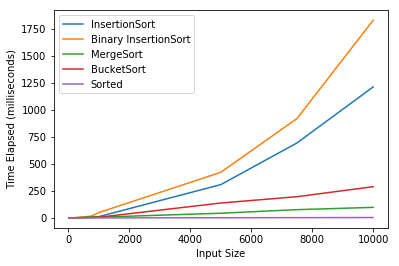

In [198]:
ax = df2.plot(x='Input Size', y=['InsertionSort', 'Binary InsertionSort', 'MergeSort', 'BucketSort', 'Sorted'])
ax.set_ylabel("Time Elapsed (milliseconds)");

I was suprised to find that Binary Insertion Sort appears to be less efficient that traditional Insertion Sort for all input sizes.

## Summary

* All the sorting algorithms I've investigated appear to work best on almost fully sorted data. This is desirable as we don't want to spend more time than necessary iterating through an already sorted array. However it is unlikely real world data will be almost fully sorted when it is passed to an algorithm
* Benchmarking algorithms using the average of multiple runs, gives a better representation of how execution time increases with input size. I saw this particularly with the BucketSort algorithm.
* Python's inbuilt sorting function, sorted(), is the best performaing sorting algorithm for all input sizes. 

## References


#### Documentation
* [The Python Standard Library](https://docs.python.org/3/library/)
> * [Time](https://docs.python.org/3/library/time.html) function, accessed 13th April 2019. 
> * [Reading and Writing CSV files](https://docs.python.org/3/library/csv.html), accessed 13th April 2019.
* [Pandas Documentation]()
> * [pandas.DataFrame](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html) function, accessed 13th April 2019.

#### Wikipedia Pages 
* [In-Place Algorithm](https://en.wikipedia.org/wiki/In-place_algorithm), accessed 25 April 2019.
* [TimSort](https://en.wikipedia.org/wiki/Timsort), accessed 23 April 2019.

#### Other 
* [Binary Insertion Sort](https://www.geeksforgeeks.org/binary-insertion-sort/), page on geeksforgeeks.org, accessed 25 April 2019.
* [Timsort: The Fastest sorting algorithm for real-world problems](https://dev.to/s_awdesh/timsort-fastest-sorting-algorithm-for-real-world-problems--2jhd), blog post by Awdesh, accessed 5 May 2019.
* [Python: MergeSort algorithm explained](https://www.youtube.com/watch?v=Nso25TkBsYI), a Youtube tutorial by Joe James, accessed 5 May 2019.
* [In-Place Algorithm](https://www.geeksforgeeks.org/in-place-algorithm/) page on geeksforgeeks.org, accessed 9 May 2019.
* [Is there a way to mathematically prove stability in sorting Algorithms?](https://www.quora.com/Is-there-a-way-to-mathematically-prove-stability-in-sorting-algorithms), posted on quora.com, accessed 09 May 2019.
* [TimSort](https://www.geeksforgeeks.org/timsort/) page on geeksforgeeks.org, accessed 10 May 2019.
* [Log to the base 2 in Python](https://stackoverflow.com/questions/3719631/log-to-the-base-2-in-python) on stackoverflow, accesssed 10 May, 2019.